In [1]:
from scipy import stats

In [2]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None, alternative='two-sided')
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'.
        The following options are available:
    
        * 'two-sided': the slope of the regression line is nonzero
        * 'less': the slope of the regression line is l

In [3]:
import pandas as pd
import pandas_datareader as web

In [6]:
# spy_etf = web.DataReader('SPY', 'google')
spy_etf = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1903 entries, 2010-01-04 to 2017-07-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1903 non-null   float64
 1   High       1903 non-null   float64
 2   Low        1903 non-null   float64
 3   Close      1903 non-null   float64
 4   Adj Close  1903 non-null   float64
 5   Volume     1903 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 104.1 KB


In [9]:
spy_etf

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,94.130867,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,94.380074,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,94.446495,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,94.845207,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,95.160805,126402800
...,...,...,...,...,...,...
2017-07-19,246.020004,247.000000,246.009995,246.990005,238.910080,51034300
2017-07-20,247.279999,247.419998,246.470001,247.100006,239.016479,47135200
2017-07-21,246.440002,246.910004,246.179993,246.880005,238.803665,82340800


In [11]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-25')

In [26]:
aapl = web.DataReader('AAPL', 'yahoo', start, end)
aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556001
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439794
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482606
...,...,...,...,...,...,...
2017-07-19,37.855000,37.487499,37.619999,37.755001,83692000.0,35.793888
2017-07-20,37.935001,37.547501,37.875000,37.584999,68974800.0,35.632721
2017-07-21,37.610001,37.220001,37.497501,37.567501,105010400.0,35.616131


In [27]:
# Fix this
# https://www.fool.com/investing/2020/08/31/apple-stock-split-today-what-you-need-know/
aapl = aapl * 4
aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,1.974918e+09,26.178749
2010-01-05,30.798573,30.464285,30.657145,30.625715,2.407619e+09,26.224003
2010-01-06,30.747145,30.107143,30.625715,30.138573,2.208640e+09,25.806879
2010-01-07,30.285715,29.864285,30.250000,30.082855,1.908525e+09,25.759174
2010-01-08,30.285715,29.865717,30.042856,30.282856,1.790443e+09,25.930426
...,...,...,...,...,...,...
2017-07-19,151.419998,149.949997,150.479996,151.020004,3.347680e+08,143.175552
2017-07-20,151.740005,150.190002,151.500000,150.339996,2.758992e+08,142.530884
2017-07-21,150.440002,148.880005,149.990005,150.270004,4.200416e+08,142.464523


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

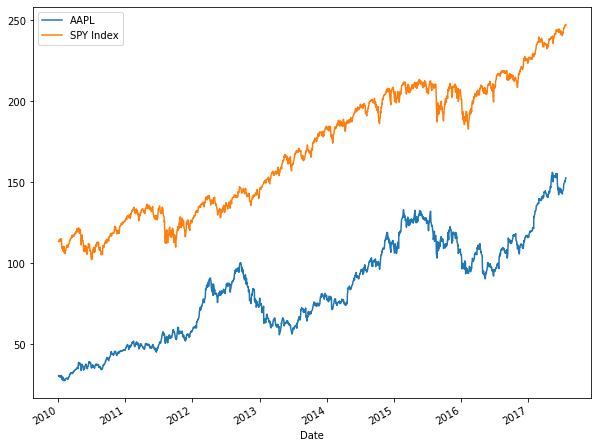

In [28]:
aapl['Close'].plot(label='AAPL', figsize=(10, 8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

In [29]:
aapl['Cumulative'] = aapl['Close'] / aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close'] / spy_etf['Close'].iloc[0]

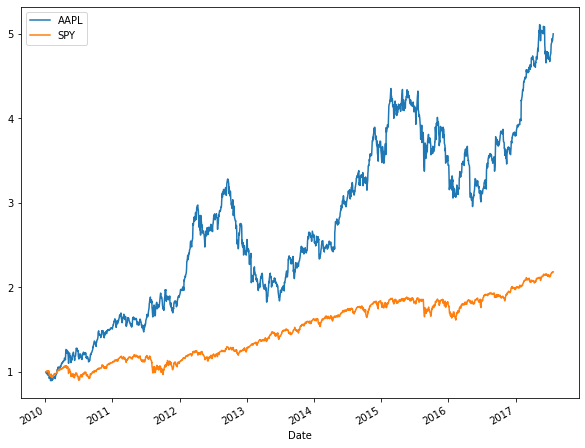

In [30]:
aapl['Cumulative'].plot(label='AAPL', figsize=(10, 8))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()

In [32]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

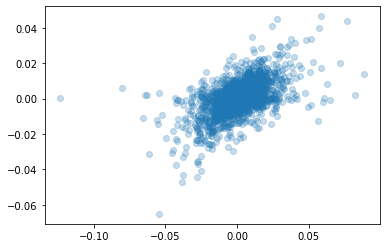

In [33]:
plt.scatter(aapl['Daily Return'], spy_etf['Daily Return'], alpha=0.25)

In [35]:
beta, alpha, r_value, p_value, std_value = stats.linregress(
    aapl['Daily Return'].iloc[1:], spy_etf['Daily Return'].iloc[1:])

In [36]:
beta

0.3259515068838618

In [37]:
alpha

0.00013716483707344832

In [38]:
r_value

0.5559565844398596

In [39]:
spy_etf['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
Name: Daily Return, dtype: float64

In [40]:
import numpy as np

In [41]:
noise = np.random.normal(0, 0.001, len(spy_etf['Daily Return'].iloc[1:]))
noise

array([ 0.001948  , -0.00324802, -0.00124269, ..., -0.00056997,
        0.00058972, -0.00195629])

In [42]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise
fake_stock

Date
2010-01-05    0.004595
2010-01-06   -0.002544
2010-01-07    0.002979
2010-01-08    0.004349
2010-01-11    0.001039
                ...   
2017-07-19    0.004241
2017-07-20    0.000212
2017-07-21   -0.001460
2017-07-24    0.000347
2017-07-25    0.000475
Name: Daily Return, Length: 1902, dtype: float64

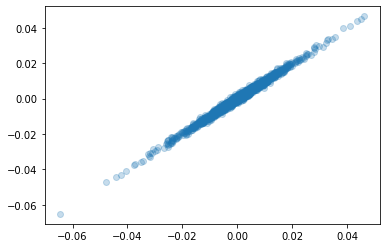

In [43]:
plt.scatter(fake_stock, spy_etf['Daily Return'].iloc[1:], alpha=.25)

In [44]:
beta, alpha, r_value, p_value, std_value = stats.linregress(fake_stock, spy_etf['Daily Return'].iloc[1:])

In [45]:
beta

0.9895160675644036

In [46]:
alpha

7.843813212442155e-06